<a href="https://colab.research.google.com/github/Jesanchezm/Business-Analytics/blob/main/Reto_2_Modelo_%C3%81rbol_JESM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#se trae el modelo
from sklearn.tree import DecisionTreeClassifier #prestamo interbibliotecario


Se carga la base de datos

In [ ]:
nxl='/2. BD2_In_App_Pur_Int.xlsx'
XDB=pd.read_excel(nxl, sheet_name=0)
XDB=XDB.dropna() #Evita Celdas Vacías
XDB.head()


#Seleccionamos las variables de interés
XD=XDB[['Age', 'Income', 'Years', 'Hours']]
XD.head()
XD=np.array(XD) #Convierte la tabla en números - Variables de entrada
yd=XDB[['Buy']]; yd=np.array(yd) #Variable de salida - Convierto a la tabla

Se procede con la construcción de modelo de árbol

In [ ]:
mar=DecisionTreeClassifier(criterion='gini', max_depth=4)
mar.fit(XD,yd)
ydp=mar.predict(XD) #Estos valores de pronóstico sirven para evaluar el modelo

#Evaluamos el modelo
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

Ex=(VP+VN)/(VP+VN+FP+FN)
Se=VP/(VP+FN)
Es=VN/(VN+FP)

print('Exactitud: ',Ex)
print('Sensibilidad: ',Se)
print('Especificidad: ',Es)

Exactitud:  0.8475
Sensibilidad:  0.9478672985781991
Especificidad:  0.7354497354497355


Se procede con la visualización del árbol

In [ ]:
from sklearn.tree import export_graphviz #Estructura del árbol
from pydotplus import graph_from_dot_data #Que datos le voy a colocar al árbol

vs=['Age', 'Income', 'Years', 'Hours'] #Estos nombres aparecen en el árbol

dot_data=export_graphviz(mar, feature_names=vs) #Asegurar nombres del gráfico
graph=graph_from_dot_data(dot_data) #Se hace el gráfico del árbol
graph.write_png('arbol.png') #Se crea la imagen

True

Se calculan los valores de preaprobación a los solicitantes nuevos

In [ ]:
XDB2=pd.read_excel(nxl,sheet_name=1)
XDB2=XDB2[['Age', 'Income', 'Years', 'Hours']]
XDB2=XDB2.dropna()

XD2=np.array(XDB2)
ydp2=mar.predict(XD2)
XDB2['Buy']=ydp2
XDB2.head()

XDB2.to_excel('NuevosCompradores.xlsx')

len(ydp2)
np.sum(ydp2)
len(ydp2)-np.sum(ydp2)

1

**ANÁLISIS DE RESULTADOS**
En la base de datos se puede observar un total de 400 posibles compradores por medio de la aplicación. El modelo logró una exactitud de 84% lo cuál muestra una gran precisión para predecir los posibles compradores.Adicional a esto, el modelo dió una sensibilidad de 94% y una especificidad de 73%.
Al realizar el análisis del árbol del modelo, encontramos 3 diferentes nodos puros los cuales se pueden apreciar en la imagen adjunta más abajo.
Gracias a esto se pudo analizar los diferentes sujetos de la base de datos y así predecir junto a al regla de negocio, cuál sería su comportamiento frente a la posibilidad de hacer compras en la aplicación.


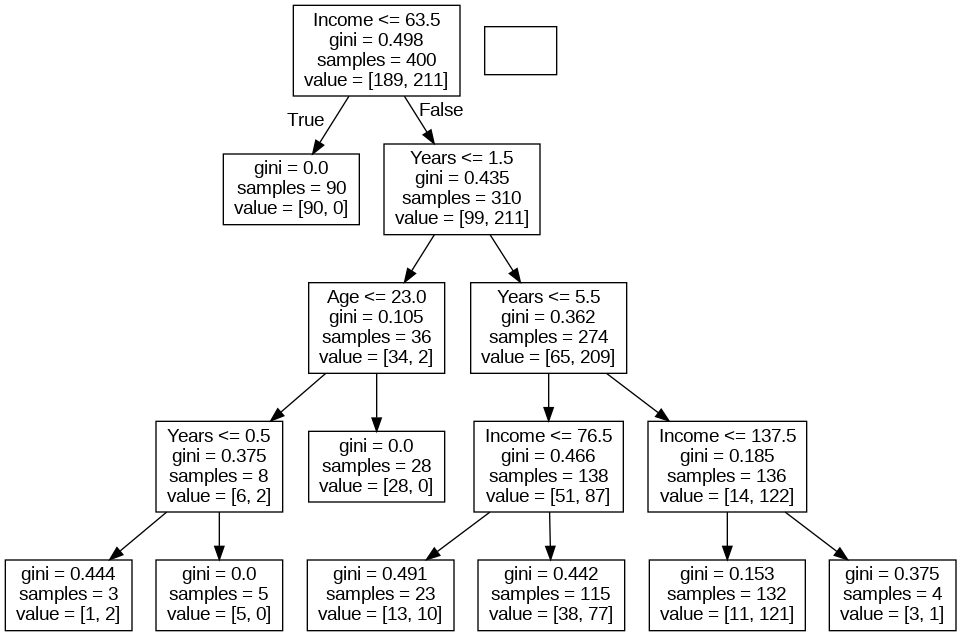